In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import math
import latexify


Bad key savefig.frameon in file /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an updated matplotlibrc file from
https

In [2]:
gamma_eg = 200
T2 = 0.4*10**-6
N = 1.32*10**14
g = 0.02*2*np.pi
omega_c = 2*np.pi*3*10**9
Q = 5*10**4
kappa_c = omega_c/Q
q = 16
s_in = 1*10**(-12)

maser_threshold = gamma_eg*((1+kappa_c/(2*T2*(g**2)*N))/(1-kappa_c/(2*T2*(g**2)*N)))
over_pump_threshold = (((4*(g**2)*N)/kappa_c) - (2/T2))/q

print(maser_threshold)
print(over_pump_threshold)

316.84418612151524
1069800.7675795092


In [3]:
@latexify.with_latex
def amplifying_gain(pump_rate):
    return ((((pump_rate - gamma_eg)/(pump_rate + gamma_eg))*N + (((q*pump_rate + gamma_eg + 2/T2)*kappa_c)/(4*g**2)))**2)/((((pump_rate - gamma_eg)/(pump_rate + gamma_eg))*N - (((q*pump_rate + gamma_eg + 2/T2)*kappa_c)/(4*g**2)))**2)

print(amplifying_gain)

\mathrm{amplifying_gain}(pump_rate)\triangleq \frac{(\frac{pump_rate - gamma_eg}{pump_rate + gamma_eg}N + \frac{(qpump_rate + gamma_eg + \frac{2}{T2})kappa_c}{4g^{2}})^{2}}{(\frac{pump_rate - gamma_eg}{pump_rate + gamma_eg}N - \frac{(qpump_rate + gamma_eg + \frac{2}{T2})kappa_c}{4g^{2}})^{2}}


In [4]:
@latexify.with_latex
def masing_gain(pump_rate):
    return (np.sqrt(((pump_rate + gamma_eg)/(2*np.absolute(s_in)**2))*(((pump_rate - gamma_eg)/(pump_rate + gamma_eg))*N - (((q*pump_rate + gamma_eg + 2/T2)*kappa_c)/(4*g**2))))-1)**2

print(masing_gain)

\mathrm{masing_gain}(pump_rate)\triangleq (\mathrm{np.sqrt}\left(\frac{pump_rate + gamma_eg}{2\mathrm{np.absolute}\left(s_in\right)^{2}}(\frac{pump_rate - gamma_eg}{pump_rate + gamma_eg}N - \frac{(qpump_rate + gamma_eg + \frac{2}{T2})kappa_c}{4g^{2}})\right) - 1)^{2}


In [5]:
def Q_threshold(pump_rate):
    return ((pump_rate+gamma_eg)/(pump_rate-gamma_eg))*(((q*pump_rate + gamma_eg + 2/T2)*omega_c)/(4*N*g**2))

In [6]:
pump_rate_Q_th = np.arange(316, 1069800, 1)
Q_th = Q_threshold(pump_rate_Q_th)
np.min(Q_th)
np.where(Q_th == 12134.869233391466)
pump_rate_Q_th[11068]

11384

In [7]:
pump_rate1 = np.arange(200, 316, 0.1)

In [8]:
pump_rate2 = np.arange(318, 1069200, 1)

In [9]:
pump_rate3 = np.arange(1069800, 10698000, 10)

In [10]:
gain1 = amplifying_gain(pump_rate1)

In [11]:
gain2 = masing_gain(pump_rate2)
gain2_unstable = amplifying_gain(pump_rate2)

In [12]:
gain3 = amplifying_gain(pump_rate3)

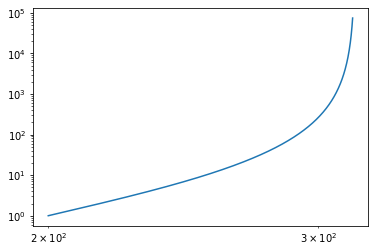

In [13]:
plt.plot(pump_rate1, gain1)
plt.xscale('log')
plt.yscale('log')

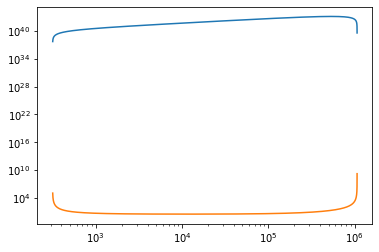

In [14]:
plt.plot(pump_rate2, gain2)
plt.plot(pump_rate2, gain2_unstable)
plt.xscale('log')
plt.yscale('log')

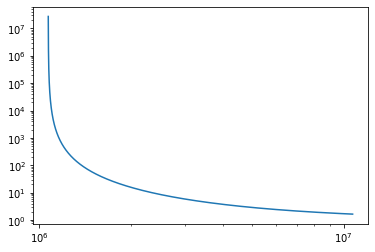

In [15]:
plt.plot(pump_rate3, gain3)
plt.xscale('log')
plt.yscale('log')

In [16]:
gain = np.append(gain1,gain2)
pump_rates = np.append(pump_rate1, pump_rate2)
gain = gain = np.append(gain,gain3)
pump_rates = np.append(pump_rates, pump_rate3)

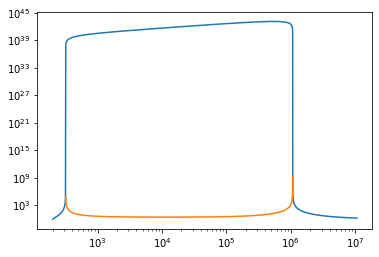

In [17]:
plt.plot(pump_rates, gain)
plt.plot(pump_rate2, gain2_unstable)
plt.xscale('log')
plt.yscale('log')

In [18]:
Q = 500
kappa_c = omega_c/Q
pump_rate_low_Q = np.arange(200, 1069800, 1)
gain_low_Q1 = amplifying_gain(pump_rate_low_Q)
Q = 3000
kappa_c = omega_c/Q
gain_low_Q2 = amplifying_gain(pump_rate_low_Q)
print(np.max(gain_low_Q2))
print(np.max(gain_low_Q1))

2.745065277501993
1.1792842271038495


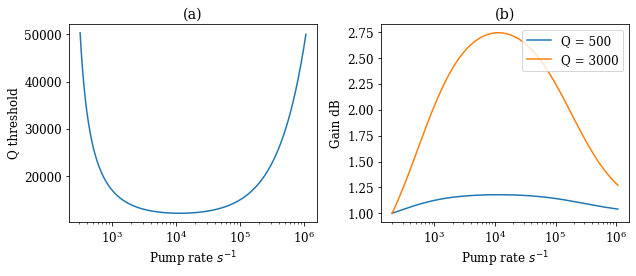

In [25]:
plt.rc('font', family='serif', size='12')
plt.rc('ytick', labelsize='12')
plt.rc('xtick', labelsize='12')

fig = plt.figure(figsize=(9,4))
ax1 = fig.add_subplot(122)
ax1.plot(pump_rate_low_Q, gain_low_Q1, label='Q = 500')
ax1.plot(pump_rate_low_Q, gain_low_Q2, label='Q = 3000')
plt.legend(loc='upper right')
plt.title('(b)')
plt.xscale('log')
#plt.text(3,0.1,'Absorbing')
#plt.text(5000,0.1,'Amplifying')
ax1.set_ylabel('Gain dB', fontsize=12)
ax1.set_xlabel('Pump rate $s^{-1}$', fontsize=12)


ax2 = fig.add_subplot(121)
ax2.plot(pump_rate_Q_th, Q_th)
plt.xscale('log')
plt.title('(a)')
#plt.yscale('log')
ax2.set_ylabel('Q threshold', fontsize=12)
ax2.set_xlabel('Pump rate $s^{-1}$', fontsize=12)

plt.tight_layout()
plt.savefig('/Users/lyracronin/Dropbox/Apps/Overleaf/mqthesis-master/figures/amplifying_gain.pdf')

In [67]:
def plus_one(B):
    return 2.87 + B*28.024952

def minus_one(B):
    return 2.87 - B*28.024952

def zero(B):
    return 0 + B*0

In [68]:
B = np.arange(0,300*10**-3,0.1)

In [69]:
delta_plus = plus_one(B)
delta_minus = minus_one(B)
delta_zero = zero(B)

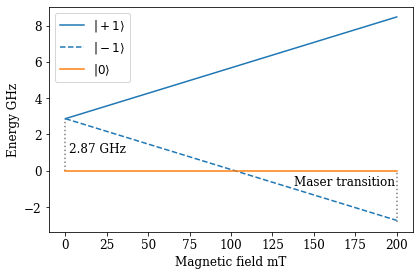

In [70]:
plt.rc('font', family='serif', size='12')
plt.rc('ytick', labelsize='12')
plt.rc('xtick', labelsize='12')

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

ax.plot(B*10**3, delta_plus, color='tab:blue', label=r'$\left|+1\right>$')
ax.plot(B*10**3, delta_minus, color='tab:blue', linestyle='dashed', label=r'$\left|-1\right>$')
ax.plot(B*10**3, delta_zero, color='tab:orange', label=r'$\left|0\right>$')

plt.vlines(x=0, ymin=0, ymax=2.87, color='grey', linestyle=':')
plt.vlines(x=200, ymin=-2.8, ymax=0, color='grey', linestyle=':')

plt.text(2,1,'2.87 GHz')
plt.text(138,-0.8,'Maser transition')

ax.set_ylabel('Energy GHz', fontsize=12)
ax.set_xlabel('Magnetic field mT', fontsize=12)

plt.legend()
plt.tight_layout()
plt.savefig('/Users/lyracronin/Dropbox/Apps/Overleaf/mqthesis-master/figures/zeeman_splitting.pdf')

array([ 2.87     ,  0.0675048, -2.7349904])